In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Online%20Sales%20Data.csv'

In [3]:
dt=pd.read_csv(url)
dt.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [4]:
dt=dt.drop(columns='Date')

In [5]:
dt.isnull().sum()

Transaction ID      0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

<Axes: xlabel='Units Sold', ylabel='count'>

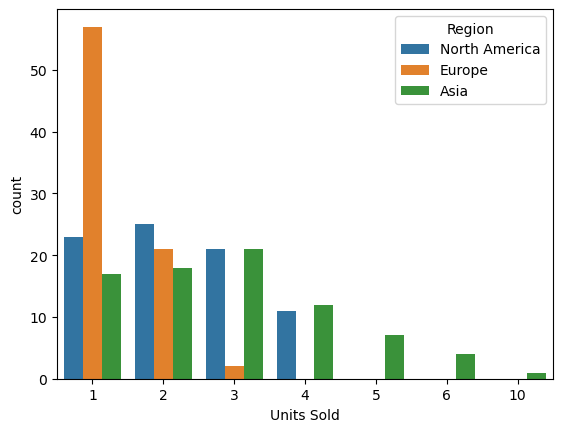

In [6]:
sns.countplot(data=dt,x='Units Sold',hue='Region')

<Axes: xlabel='Total Revenue', ylabel='Count'>

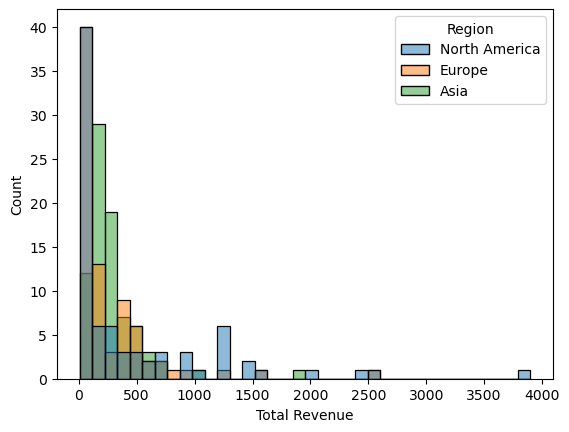

In [7]:
sns.histplot(dt,x='Total Revenue',hue='Region')

<Axes: xlabel='Total Revenue', ylabel='Count'>

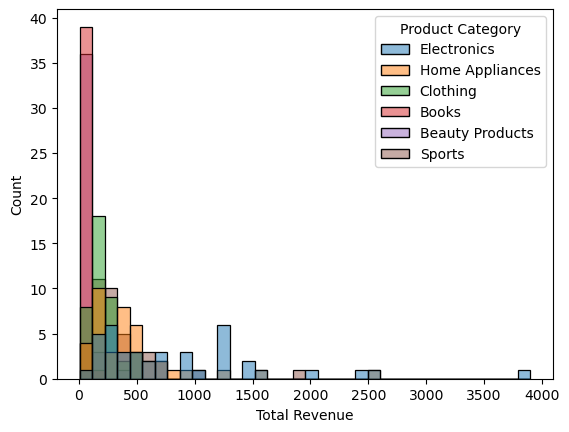

In [8]:
sns.histplot(dt,x='Total Revenue',hue='Product Category')

<Axes: xlabel='Region', ylabel='Total Revenue'>

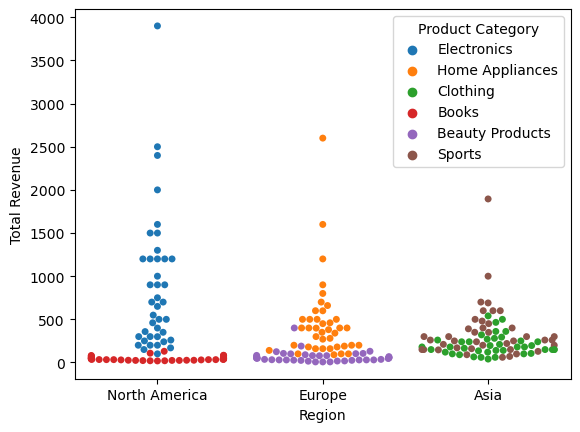

In [9]:
sns.swarmplot(dt,x='Region',y='Total Revenue',hue='Product Category')

<Axes: xlabel='Product Category', ylabel='Units Sold'>

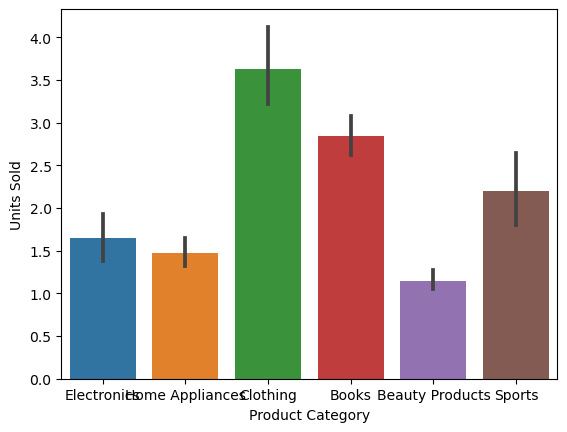

In [10]:
sns.barplot(dt,x='Product Category',y='Units Sold')

In [11]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()
RS

RobustScaler()

In [12]:
dt[['Unit Price','Total Revenue']]=RS.fit_transform(dt[['Unit Price','Total Revenue']])
dt.head()

,Transaction ID,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,Electronics,iPhone 14 Pro,2,4.127171,5.412508,North America,Credit Card
1,10002,Home Appliances,Dyson V11 Vacuum,1,1.859495,0.951704,Europe,PayPal
2,10003,Clothing,Levi's 501 Jeans,3,-0.090707,0.089217,Asia,Debit Card
3,10004,Books,The Da Vinci Code,4,-0.335616,-0.345001,North America,Credit Card
4,10005,Beauty Products,Neutrogena Skincare Set,1,0.000000,-0.267591,Europe,PayPal


In [13]:
dt=pd.get_dummies(dt,dtype='int',drop_first=True)
dt

,Transaction ID,Units Sold,Unit Price,Total Revenue,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,Product Name_Adidas 3-Stripes Shorts,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2,4.127171,5.412508,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,1,1.859495,0.951704,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,3,-0.090707,0.089217,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,4,-0.335616,-0.345001,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,1,0.000000,-0.267591,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,1,0.317475,-0.059418,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,3,0.000045,0.267739,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,3,-0.358293,-0.437162,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,1,-0.158692,-0.371647,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [14]:
X=dt.drop(columns='Total Revenue')
X

,Transaction ID,Units Sold,Unit Price,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,Product Name_Adidas 3-Stripes Shorts,Product Name_Adidas Essential Track Pants,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2,4.127171,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,1,1.859495,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,3,-0.090707,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,4,-0.335616,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,1,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,1,0.317475,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,3,0.000045,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,3,-0.358293,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,1,-0.158692,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
y=dt['Total Revenue']
y

0      5.412508
1      0.951704
2      0.089217
3     -0.345001
4     -0.267591
         ...   
235   -0.059418
236    0.267739
237   -0.437162
238   -0.371647
239   -0.356837
Name: Total Revenue, Length: 240, dtype: float64

In [16]:
dt

,Transaction ID,Units Sold,Unit Price,Total Revenue,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home Appliances,Product Category_Sports,Product Name_Adidas 3-Stripes Shorts,...,Product Name_Yeti Roadie 24 Cooler,Product Name_Yeti Tundra Haul Portable Wheeled Cooler,Product Name_Youth to the People Superfood Antioxidant Cleanser,Product Name_Zara Summer Dress,Product Name_iPhone 14 Pro,Product Name_iRobot Braava Jet M6,Region_Europe,Region_North America,Payment Method_Debit Card,Payment Method_PayPal
0,10001,2,4.127171,5.412508,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,10002,1,1.859495,0.951704,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,10003,3,-0.090707,0.089217,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,10004,4,-0.335616,-0.345001,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10005,1,0.000000,-0.267591,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,10236,1,0.317475,-0.059418,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
236,10237,3,0.000045,0.267739,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
237,10238,3,-0.358293,-0.437162,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
238,10239,1,-0.158692,-0.371647,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.25)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred=lr.predict(X_test)
y_pred

array([ 4.06627821e+01, -7.72051793e+00, -2.67667157e+00, -5.10304049e+01,
        1.73061446e+00, -1.30576776e+00,  7.14481585e-01,  1.16543454e+00,
        1.83278477e+00,  2.65342168e-01,  1.79744950e+00,  5.67628833e-01,
        4.03349959e+01,  1.90904742e+00, -1.60168293e+00, -1.00578247e+01,
        3.57000478e+00,  9.22972037e-01,  6.08313815e-02, -1.27260772e+01,
        3.60424477e+01,  6.33868030e-01, -4.42871625e+00,  6.48242389e-01,
       -2.00754530e+00,  1.04497420e+01,  5.68165647e+00, -6.71479570e+00,
        3.39432059e-01,  4.79016094e+00,  6.41642027e+00,  4.87957040e+01,
        2.10661367e-02, -6.36247245e+01, -2.49340423e+01,  1.04522122e+00,
        1.41698780e+01,  4.80134102e+01,  6.16100554e+00,  3.09632092e+00,
        1.32597435e+01,  4.59154426e+01,  3.92585383e-01,  8.53240391e-01,
        5.11313467e+00, -1.07962250e+02,  8.61032277e-01,  5.08386644e+00,
       -1.11886023e+01,  4.88659228e+01, -3.81553498e+01,  2.37054684e-01,
        2.14469876e+00,  

In [44]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

ValueError: continuous is not supported